<a href="https://colab.research.google.com/github/derrickgzq/germancreditdata/blob/main/Credit_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/germancreditdata/main/german_credit_data%20(1).csv')
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

columns details:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Risk (Value target - Good or Bad Risk)

# Analysis

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.style.background_gradient(cmap = 'Greens')

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')
df[['Saving accounts','Checking account']] = imputer.fit_transform(df[['Saving accounts','Checking account']])

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Data visualizations

Text(0.5, 1.0, 'Credit amount distribution')

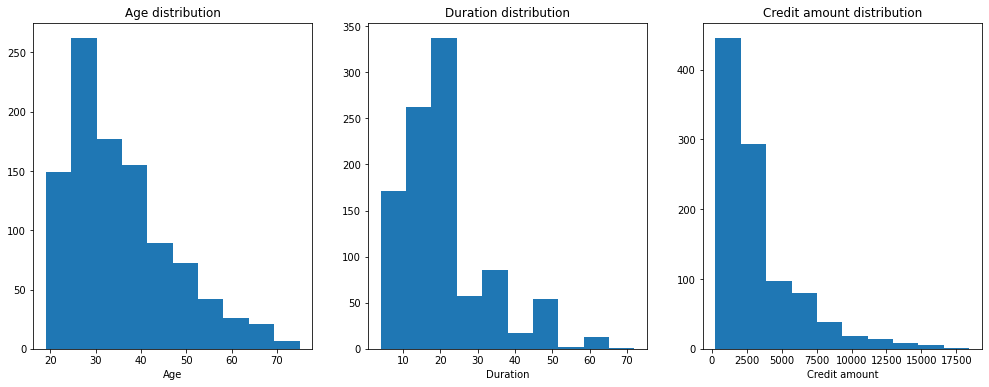

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (17,6))
ax[0].hist(df['Age'])
ax[0].set_xlabel('Age')
ax[0].set_title('Age distribution')
ax[1].hist(df['Duration'])
ax[1].set_xlabel('Duration')
ax[1].set_title('Duration distribution')
ax[2].hist(df['Credit amount'])
ax[2].set_xlabel('Credit amount')
ax[2].set_title('Credit amount distribution')


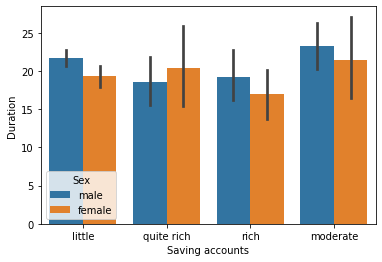

In [ ]:
sns.barplot(data = df, x = df['Saving accounts'], y = df['Duration'], hue = 'Sex')

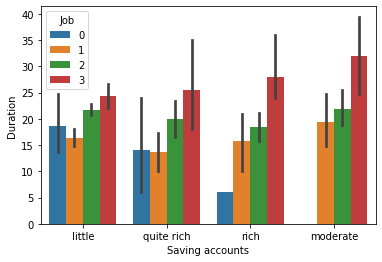

In [ ]:
sns.barplot(data = df, x = df['Saving accounts'], y = df['Duration'], hue = 'Job')

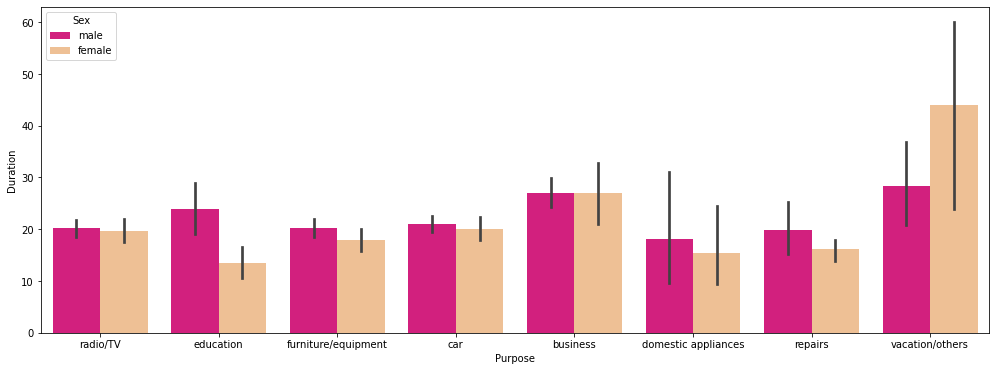

In [ ]:
fig = plt.subplots(figsize = (17,6))
sns.barplot(data = df, x = df['Purpose'], y = df['Duration'], hue = 'Sex', palette = 'Accent_r')

Text(0.5, 0, 'Duration')

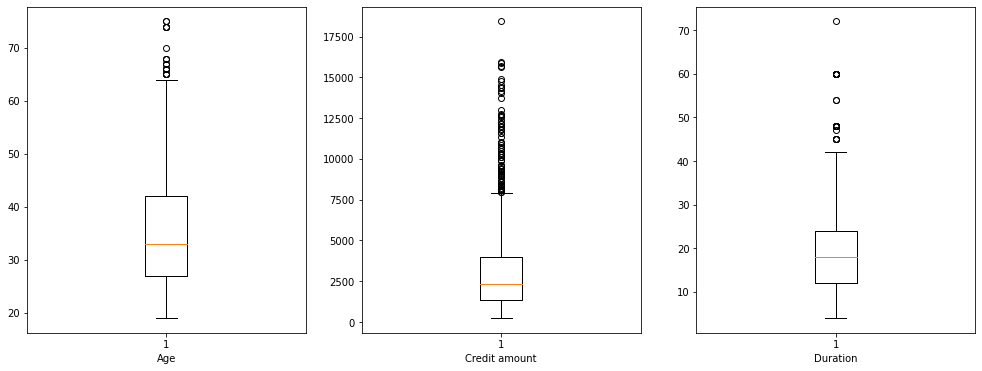

In [ ]:
fig,ax = plt.subplots(1,3, figsize = (17,6))
ax[0].boxplot(df['Age'])
ax[0].set_xlabel('Age')
ax[1].boxplot(df['Credit amount'])
ax[1].set_xlabel('Credit amount')
ax[2].boxplot(df['Duration'])
ax[2].set_xlabel('Duration')


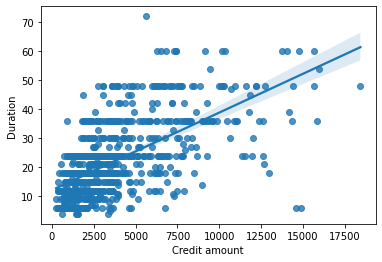

In [ ]:
sns.regplot(data = df, y = df['Duration'], x = df['Credit amount'])

In [ ]:
corr = df[['Credit amount','Duration']].corr()
corr

,Credit amount,Duration
Credit amount,1.000000,0.624984
Duration,0.624984,1.000000


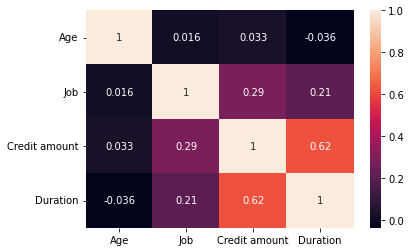

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

We can see that credit amount and duration has the strongest positive correlation. Meaning that when a person credits for a higher amount, the loan duration will be higher.

# Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
scaler  = MinMaxScaler()
scale = scaler.fit_transform(df[['Age','Job','Credit amount','Duration']])

df_scale = pd.DataFrame(scale, columns = ['Age','Job','Credit amount','Duration'])

df_scale.head(5)

,Age,Job,Credit amount,Duration
0,0.857143,0.666667,0.050567,0.029412
1,0.053571,0.666667,0.313690,0.647059
2,0.535714,0.333333,0.101574,0.117647
3,0.464286,0.666667,0.419941,0.558824
4,0.607143,0.666667,0.254209,0.294118


In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pca_df.head()

,principal component 1,principal component 2
0,-0.128183,0.584940
1,0.285502,-0.283953
2,-0.312635,0.235845
3,0.296980,0.131427
4,0.091990,0.304725


In [ ]:
K = range(2,25)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans = kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    print('k:',k,'wss:',wss_iter)
    wss.append(wss_iter)

k: 2 wss: 64.4172028197213
k: 3 wss: 42.27036707578498
k: 4 wss: 31.878685799848526
k: 5 wss: 27.05025076954518
k: 6 wss: 23.058451296225105
k: 7 wss: 19.52934413108421
k: 8 wss: 17.268915941340254
k: 9 wss: 15.352322732611258
k: 10 wss: 13.449621312894408
k: 11 wss: 12.059471478549366
k: 12 wss: 10.996536046229107
k: 13 wss: 10.150426549789845
k: 14 wss: 9.545465070816412
k: 15 wss: 8.917801841083442
k: 16 wss: 8.32980732533196
k: 17 wss: 7.78154704760321
k: 18 wss: 7.346181108966315
k: 19 wss: 7.052685599581027
k: 20 wss: 6.511207943404029
k: 21 wss: 6.218037129322326
k: 22 wss: 5.952455770695254
k: 23 wss: 5.7211958077096705
k: 24 wss: 5.340658753170528


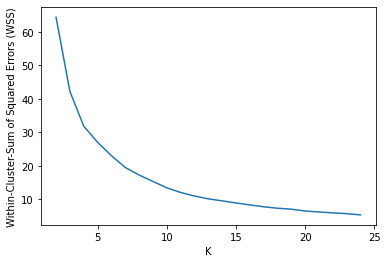

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
for i in range(2,25):
  labels = cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
  +str(metrics.silhouette_score(df_scale,labels,metric = "euclidean",sample_size = 1000,random_state = 200)))

Silhouette score for k(clusters) = 2 is 0.29451560572792335
Silhouette score for k(clusters) = 3 is 0.3154005364281776
Silhouette score for k(clusters) = 4 is 0.3394929615284149
Silhouette score for k(clusters) = 5 is 0.3555282279847835
Silhouette score for k(clusters) = 6 is 0.35513915437922744
Silhouette score for k(clusters) = 7 is 0.3615732640285162
Silhouette score for k(clusters) = 8 is 0.29766479160342546
Silhouette score for k(clusters) = 9 is 0.29828166873850415
Silhouette score for k(clusters) = 10 is 0.29676994878904894
Silhouette score for k(clusters) = 11 is 0.30121782521758694
Silhouette score for k(clusters) = 12 is 0.29990428905082706
Silhouette score for k(clusters) = 13 is 0.30677612558462986
Silhouette score for k(clusters) = 14 is 0.2930610838594678
Silhouette score for k(clusters) = 15 is 0.299211194896896
Silhouette score for k(clusters) = 16 is 0.2850524373879008
Silhouette score for k(clusters) = 17 is 0.2980702811381412
Silhouette score for k(clusters) = 18 is 

k = 7 is the optimum

In [ ]:
kmeans = cluster.KMeans(n_clusters = 7)
kmeans = kmeans.fit(pca_df)

In [ ]:
kmeans.fit_predict(pca_df)

array([4, 2, 5, 2, 4, 0, 4, 6, 5, 6, 0, 2, 0, 5, 0, 3, 4, 2, 6, 0, 1, 1,
       5, 1, 0, 3, 3, 1, 1, 4, 1, 0, 0, 5, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2,
       4, 2, 2, 3, 1, 0, 3, 6, 0, 0, 4, 3, 4, 2, 2, 0, 0, 1, 4, 6, 0, 4,
       0, 0, 2, 0, 2, 5, 4, 1, 6, 4, 2, 4, 2, 0, 1, 1, 3, 5, 5, 2, 0, 6,
       2, 0, 4, 4, 3, 0, 4, 6, 4, 1, 2, 6, 1, 0, 0, 1, 0, 6, 6, 0, 2, 1,
       0, 0, 0, 2, 1, 2, 6, 0, 2, 2, 0, 2, 3, 4, 0, 0, 3, 0, 2, 0, 2, 2,
       3, 1, 6, 1, 2, 5, 1, 5, 3, 6, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       6, 0, 1, 5, 1, 3, 1, 0, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 6,
       1, 5, 2, 4, 2, 6, 3, 4, 1, 0, 4, 5, 0, 0, 4, 0, 2, 0, 2, 2, 0, 0,
       1, 2, 5, 3, 2, 0, 3, 6, 1, 0, 0, 4, 1, 1, 4, 4, 4, 3, 0, 2, 3, 4,
       3, 0, 0, 0, 0, 2, 6, 4, 0, 0, 2, 5, 1, 3, 5, 2, 3, 5, 1, 1, 0, 5,
       2, 0, 3, 0, 1, 1, 0, 0, 3, 5, 0, 2, 0, 2, 3, 0, 0, 5, 0, 4, 2, 5,
       3, 1, 2, 1, 6, 0, 0, 1, 6, 2, 0, 0, 0, 5, 0, 2, 0, 1, 5, 4, 1, 2,
       2, 6, 1, 1, 0, 6, 6, 4, 6, 2, 0, 5, 1, 0, 5,

In [ ]:
kmeans.cluster_centers_

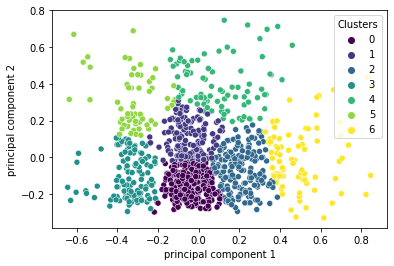

In [ ]:
pca_df['Clusters'] = kmeans.labels_
ax = sns.scatterplot(x = "principal component 1", y = "principal component 2",hue = 'Clusters',  data = pca_df, palette = 'viridis')
plt.show()

In [ ]:
pca_df

,principal component 1,principal component 2,Clusters
0,-0.128183,0.584940,4
1,0.285502,-0.283953,2
2,-0.312635,0.235845,5
3,0.296980,0.131427,2
4,0.091990,0.304725,4
...,...,...,...
995,-0.327537,-0.082734,3
996,0.352482,0.085433,6
997,-0.102635,0.061858,1
998,0.161462,-0.257751,2


In [ ]:
df_cluster = pd.concat([df['Age'],df['Credit amount'],df['Duration']],axis = 1)

In [ ]:
df_cluster

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [ ]:
df_cluster['Cluster'] = pca_df['Clusters']

In [ ]:
df_cluster

,Age,Credit amount,Duration,Cluster
0,67,1169,6,4
1,22,5951,48,2
2,49,2096,12,5
3,45,7882,42,2
4,53,4870,24,4
...,...,...,...,...
995,31,1736,12,3
996,40,3857,30,6
997,38,804,12,1
998,23,1845,45,2


3D Scatter plot

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(df_cluster.Cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_cluster[df_cluster.Cluster == C]['Credit amount'],
                                y = df_cluster[df_cluster.Cluster == C]['Age'],
                                z = df_cluster[df_cluster.Cluster == C]['Duration'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Credit amount', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Duration', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

Modelling

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data = pd.concat([df['Job'],df['Housing'],df['Saving accounts'],df['Credit amount'],df['Duration'],], axis = 1)
data

,Job,Housing,Saving accounts,Credit amount,Duration
0,2,own,little,1169,6
1,2,own,little,5951,48
2,1,own,little,2096,12
3,2,free,little,7882,42
4,2,free,little,4870,24
...,...,...,...,...,...
995,1,own,little,1736,12
996,3,own,little,3857,30
997,2,own,little,804,12
998,2,free,little,1845,45


In [ ]:
data_for_model = pd.get_dummies(data, columns = ['Housing','Saving accounts'])

In [ ]:
data_for_model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
label = df['Risk']

In [ ]:
X = data
X['Housing'] = le.fit_transform(df['Housing'].values)
X['Saving accounts'] = le.fit_transform(df['Saving accounts'].values)
#X['Purpose'] = le.fit_transform(df['Purpose'].values)

In [ ]:
y = le.fit_transform(label)

In [ ]:
X = X.rename(columns = {'Saving accounts':'Savings','Credit amount':'Credit_amount'},)

In [ ]:
X.head()

,Job,Housing,Savings,Credit_amount,Duration
0,2,1,0,1169,6
1,2,1,0,5951,48
2,1,1,0,2096,12
3,2,0,0,7882,42
4,2,0,0,4870,24


In [ ]:
df.iloc[70:80,:]

In [ ]:
df['Purpose'].value_counts()

For housing column, 1 - own, 2 - rent, 3 - free

For SA column, 0 - little, 1 - moderate, 2 - quite rich, 3 - rich

For purpose column, business - 0, car - 1, dom - 2, edu - 3, furniture - 4, radio - 5, rep - 6, vac - 7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

Determine the best number for n_neighbors

In [ ]:
maxk = 0
maxscore = 0
for x in range(1,100):
  mod = KNeighborsClassifier(n_neighbors = x)
  mod = mod.fit(X_train, y_train)
  predss = mod.predict(X_test)
  score = metrics.accuracy_score(y_test, predss)
  if score > maxscore:
    maxk = x
    maxscore = score

print(maxk)
print(maxscore)

57
0.72


In [ ]:
params = {
    'n_neighbors':  range(1, 15, 2),
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = maxk)
knn_model = knn.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

Model diagnostics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.72

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean square error: ',mean_squared_error(y_test, y_pred))

[[  4  82]
 [  2 212]]
Accuracy: 0.72
Mean square error:  0.28


In [ ]:
mean_absolute_error(y_test, y_pred)

0.28

In [ ]:
X_test.head(2)

,Job,Housing,Savings,Credit_amount,Duration
27,2,2,3,409,12
339,1,1,0,1521,10


Usage

columns details:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Risk (Value target - Good or Bad Risk)

In [ ]:
input = pd.DataFrame({'Job' : [3, 2, 3], 
                      'Credit amount' : [20000, 12000, 4000], 
                      'Duration': [36, 24, 12], 
                      'Housing_free': [0,1,1],
                      'Housing_own': [1, 0,0], 
                      'Housing_rent': [0, 0,0],
                      'Saving accounts_little': [0,0,0],
                      'Saving accounts_moderate': [0, 0,0], 
                      'Saving accounts_quite rich': [1, 1,0], 
                      'Saving accounts_rich': [0, 0,1]
                     })

In [ ]:
input = pd.DataFrame({'Job' : [3, 2, 3],  
                      'Housing': [0,1,2],
                      'Savings': [3,2,0],
                      'Credit_amount' : [20000, 12000, 4000], 
                      'Duration': [36, 24, 12],
                     })

In [ ]:
input = pd.DataFrame({'Job' : [3, 2, 3],  
                      'Savings': [3,2,0],
                      'Credit_amount' : [20000, 12000, 4000], 
                      'Duration': [36, 24, 12],
                      'Purpose': [0,1,2],
                     })

In [ ]:
output = knn_model.predict(input)
output

array([0, 0, 1])

bad = 0, good = 1

Usage for Anvil

In [ ]:
X_train.columns

Index(['Job', 'Housing', 'Saving accounts', 'Credit amount', 'Duration'], dtype='object')

In [ ]:
#saving model
pickle.dump(knn_model, open('model_new.pickle', 'wb'))

@anvil.server.callable
def predict_model(Job,Housing, Savings, Credit_amount, Duration ):

    model = pickle.load(open('model_new.pickle', 'rb'))
    predictions = knn_model.predict([[Job,Housing, Savings, Credit_amount, Duration]])[0]
    return(predictions)